<a href="https://colab.research.google.com/github/AlexeyRogS/cv_course/blob/main/week3/torch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План занятия:

## Немного про PyTorch
* Тензоры
* Дифференцирование
* Полносвязный слой
* Визуализация результатов

## Датасеты и даталоадеры
* Обзор
* Класс Датасет
* Класс Даталоадер


## Тренировка простейшей модели
* Необходимые компоненты
* Простейший тренировочный цикл
* Сохранение результатов


---

## Немного про PyTorch

[PyTorch](https://github.com/pytorch/pytorch) это open-source библиотека для глубокого обучения, разработанная команией Facebook. Библиотека начала развиваться с 2016 года и за это время успела стать очень популярной (на момент написания этого текста на гитхабе ~52.3k звездочек). Имеет несколько очень полезных модулей: [torchvision](https://pytorch.org/vision/stable/index.html), [torchaudio](https://pytorch.org/audio/stable/index.html), [torchtext](https://pytorch.org/text/stable/index.html).<br>
Более того, совсем недавно PyTorch [стал частью](https://www.linuxfoundation.org/blog/blog/welcoming-pytorch-to-the-linux-foundation) Linux Foundation.


[Torch](https://github.com/torch/torch7) (Torch7) также open-source проект, написанный на C и используемый в языке Lua. На данный момент проект заброшен и не развивается.

Давайте познакомимся с основами PyTorch.

### Тензоры

[Тензоры](https://pytorch.org/docs/stable/tensors.html) - это структура данных, схожая с массивами в numpy. В PyTorch в тензорах хранятся входные/выходные данные, а также параметры модели.

Различие тензоров и массивов `numpy` в том, что тензоры могут работать не только на CPU, но и на GPU*, а также они приспособлены для того, чтобы работать с дифференцированием.
<br>
 `*` _при большом желании массивы `numpy` тоже можно использовать на GPU, например, при помощи библиотеки [CuPy](https://cupy.dev/)_

In [1]:
import torch
import numpy as np

Мы можем создать тензор, передав туда список с данными:

In [2]:
list_data = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(list_data)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


Также мы можем создать тензор из массива numpy:


In [3]:
np_array = np.array(list_data)
tensor = torch.from_numpy(np_array)
print(type(tensor))
print(tensor)

<class 'torch.Tensor'>
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


Это можно сделать и иначе, но предыдущий способ эффективней:

In [4]:
np_array = np.array(list_data)
tensor_1 = torch.from_numpy(np_array)
tensor_2 = torch.tensor(np_array)

assert torch.allclose(tensor_1, tensor_2)

Часто возникает необходимость возвращаться в `numpy`:

У тензора есть привычные нам из numpy аттрибуты:

In [19]:
print(f'Shape: {tensor.shape}')
print(f'dtype: {tensor.dtype}')
print(f'ndim: {tensor.ndim}')

Shape: torch.Size([2, 3])
dtype: torch.int64
ndim: 2


Но есть кое-что совсем непривычное, например device:

In [7]:
print(f'device: {tensor.device}')

device: cpu


In [8]:
# numpy world

x = np.arange(16).reshape(4, 4)

print(f"X :\n{x}\n")
print(f"X.shape : {x.shape}\n")
print(f"add 5 :\n{x+5}\n")
print(f"X*X^T  :\n{np.dot(x,x.T)}\n")
print(f"mean over cols :\n{x.mean(axis=-1)}\n")
print(f"cumsum of cols :\n{np.cumsum(x, axis=0)}\n")

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [9]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print(f"X :\n{x}")
print(f"X.shape : {x.shape}\n")
print(f"add 5 :\n{x+5}")
print(f"X*X^T  :\n{x@x.T}")
print(f"mean over cols :\n{torch.mean(x, dim=-1)}")
print(f"cumsum of cols :\n{torch.cumsum(x, dim=0)}")

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


Вообще говоря далеко не все операции из numpy можно применить в torch, даже если операции имеют похожие функционал и название. Чаще всего отличие может быть в формате аргументов и в их типе данных. При необходимости, вы можете посмотреть соответствие типов данных [тут](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), а также не забывайте о существовании [документации](https://pytorch.org/docs/master/)

Вообще, если нам требуется исследовать какой-то объект в python, но нет под рукой документации, то можно воспользоваться функцией dir(), которая покажет все атрибуты и методы.

In [10]:
dir(tensor)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

В примере выше мы видели интересный атрибут, которого нет у numpy массива. Это атрибут device. Он показывает, где в данный момент находится тензор -- на CPU или на GPU. Но Для того, чтобы была возможность положить на GPU, нам необходимо, чтобы на нашей машине была установлена видеокарта, соответствующие драйвера и cuda.
В google colab по умолчанию запускается инстанс без видеокарты. Но мы можем изменитьэто в настройках, и если есть доступные видеокарты, то нам выделят ее.
Для этого надо перейти в меню во вкладочку ***Runtime -> Change runtime type*** и далее появится такое вот окошко:

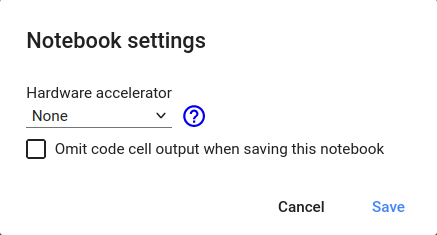

В нем нужно выбрать GPU.

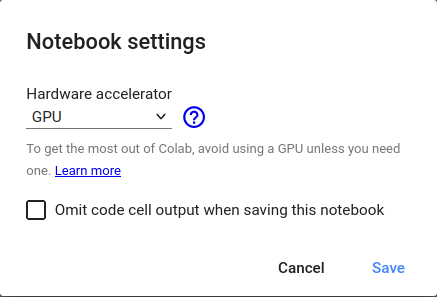

После этого мы можем проверить, есть ли у нас видеокарта при помощи команды `nvidia-smi`:

In [11]:
!nvidia-smi

Fri Sep 20 18:38:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.12                 Driver Version: 552.12         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8             12W /   80W |     231MiB /   6144MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Если все хорошо, то появится вывод вроде следующего:
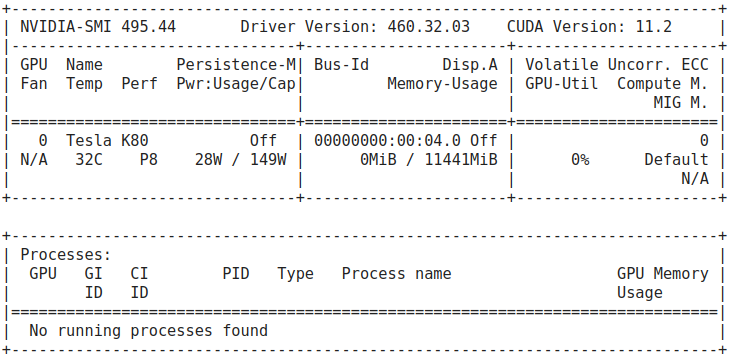

Также в pytorch есть специальный метод для того, чтобы проверить, доступна ли нам видеокарта:

In [12]:
torch.cuda.is_available()

True

In [13]:
list_data = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(list_data)

if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    # или вот так
    # tensor = tensor.cuda()
    # или
    # tensor = tensor.to('cuda:0')


print(f'device: {tensor.device}')

device: cuda:0


Зачастую нам необходимо в нескольких местах проверять, доступна ли у нас видеокарта. Поэтому вы можете встретить код, который один раз определяет девайс, на котором будут происходить вычисления. По умолчанию мы стараемся получить доступ к видеокарте, если можем.

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Иногда мы хотим проверить наш код на процессоре, и для того, чтобы отключить видеокарту нам может помочь переменная окружения `CUDA_VISIBLE_DEVICES`. Также она поможет нам, если надо сделать доступной конкретную видеокарту на сервере.

In [17]:
! CUDA_VISIBLE_DEVICES=-1 python -c "import torch; print(torch.cuda.is_available())"

"CUDA_VISIBLE_DEVICES" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [18]:
! CUDA_VISIBLE_DEVICES=0 python -c "import torch; print(torch.cuda.is_available())"

"CUDA_VISIBLE_DEVICES" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
np_array = tensor.numpy()
print(np_array)

Чтобы конвертировать в numpy нам необходимо сначала вернуться на CPU, а потом уже конвертировать в numpy:

In [20]:
tensor = tensor.to('cpu')
# или вот так
# tensor = tensor.cpu()
np_array = tensor.numpy()
print(np_array)

[[1 2 3]
 [4 5 6]]


Следует быть аккуратными, когда мы работаем с тензорами и numpy:

In [21]:
np_array = np.array([[0, 1], [2, 3]])
tensor = torch.from_numpy(np_array)
print(tensor)

tensor([[0, 1],
        [2, 3]], dtype=torch.int32)


In [22]:
np_array[0][0] = 5
print(tensor)

tensor([[5, 1],
        [2, 3]], dtype=torch.int32)


Как мы видим, изменение в numpy array приводит к изменению в тензоре. Так как они используют общую память. Аналогично, если будем менять что-то в тензоре, то и в массиве numpy будут изменения:

In [23]:
tensor[0][0] = 10
print(np_array)

[[10  1]
 [ 2  3]]


Также существуют привычные нам функции из numpy для создания тензоров:


In [24]:
tensor = torch.ones(4, 4)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [25]:
tensor = torch.zeros(4, 4)
print(tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [26]:
tensor = torch.zeros_like(tensor)
print(tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [27]:
tensor = torch.arange(0, 16)
print(tensor)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])


In [28]:
tensor = tensor.view(4, 4)
print(tensor)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


In [29]:
tensor = tensor.reshape(4, 4)
print(tensor)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


Метод `view` всегда разделяет общие данные с исходным тензором:

In [30]:
tensor = torch.zeros(3, 2)
new_tensor = tensor.view(2, 3)
tensor.fill_(1)
new_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Метод `reshape` может сработать точно так же как метод `view`, а может создать копию тензора:

In [31]:
# Same as view:

tensor = torch.zeros(3, 2)
new_tensor = tensor.reshape(2, 3)
tensor.fill_(1)
new_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [33]:
# Creates a copy of a tensor:

tensor = torch.zeros(3, 2)
new_tensor_1 = tensor.reshape(6)
new_tensor_2 = tensor.t().reshape(6)
tensor.fill_(1)
new_tensor_1, new_tensor_2

(tensor([1., 1., 1., 1., 1., 1.]), tensor([0., 0., 0., 0., 0., 0.]))

Подробней можно почитать в [документации](https://pytorch.org/docs/master/generated/torch.Tensor.view.html#torch.Tensor.view).

In [34]:
sum = tensor.sum()
print(sum)

tensor(6.)


In [35]:
sum = tensor.sum().item()
print(sum)

6.0


In [36]:
print(tensor.T)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


Список всех операций, которые мы можем производить с тензорами можно посмотреть [здесь](https://pytorch.org/docs/stable/torch.html).

$$x(t)=t-1.5\cos{15t}\\y(t)=t-1.5\sin{16t}$$

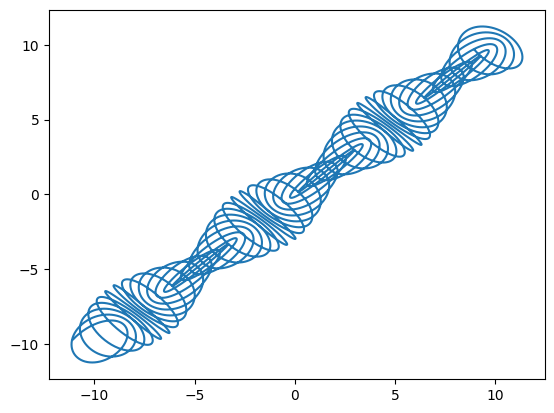

In [37]:
import matplotlib.pyplot as plt

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x = t - 1.5*torch.cos(15*t)
y = t - 1.5*torch.sin(16*t)

plt.plot(x.numpy(), y.numpy());

---

## Автоматическое дифференцирование

Давайте вспомним пример из предыдущего урока:

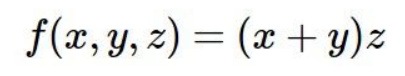

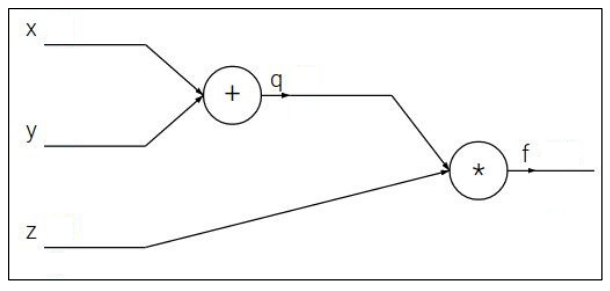

Мы хотели вычислить градиент в точке (-2, 5, -4). Вручную у нас получилось следующее:


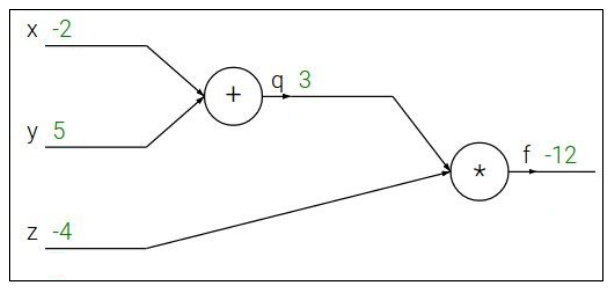

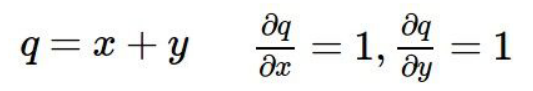

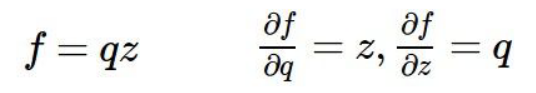

Мы ищем следующее:

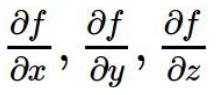

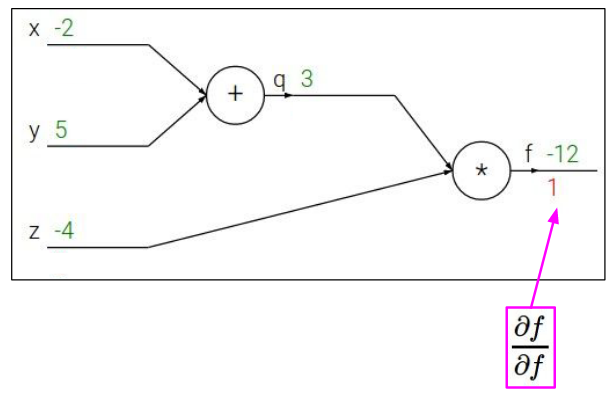

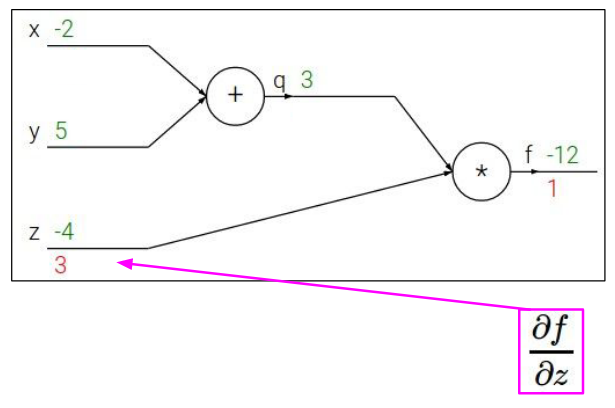

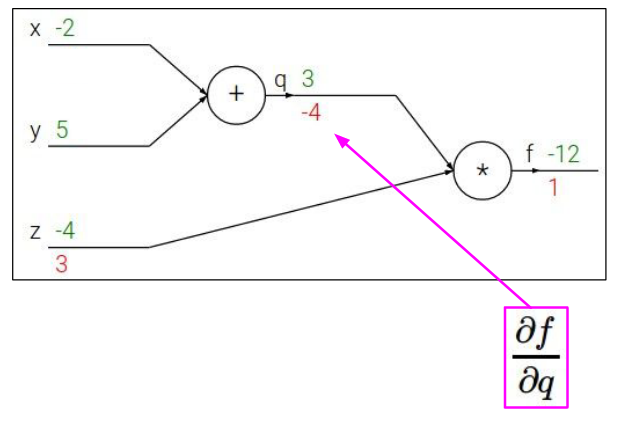

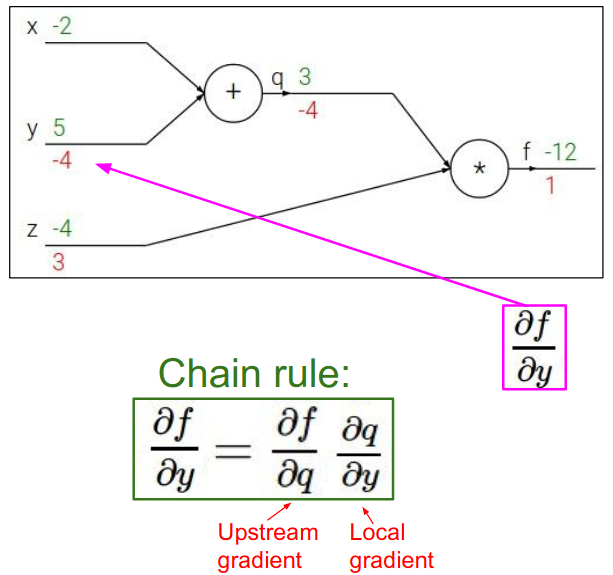

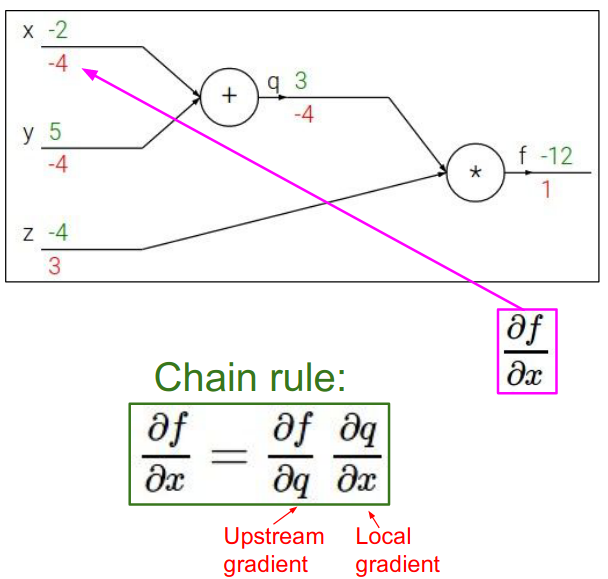

В pytorch мы можем это все представить в таком виде:

In [40]:
x = torch.tensor(-2, dtype=torch.float32, requires_grad=True)
y = torch.tensor(5, dtype=torch.float32, requires_grad=True)
z = torch.tensor(-4, dtype=torch.float32, requires_grad=True)

f = (x + y) * z


In [41]:
print(f.grad_fn)
print(x.grad_fn)
print(y.grad_fn)
print(z.grad_fn)

None
None
None


In [42]:
print(f'x grad = {x.grad}')
print(f'y grad = {y.grad}')
print(f'z grad = {z.grad}')

x grad = None
y grad = None
z grad = None


In [43]:
print(f.requires_grad)

True


In [44]:
f.backward()

print(f'x grad = {x.grad}')
print(f'y grad = {y.grad}')
print(f'z grad = {z.grad}')


x grad = -4.0
y grad = -4.0
z grad = 3.0


In [101]:
f_np = f.numpy()

In [102]:
f_np = f.detach().numpy()

In [ ]:
with torch.no_grad():
    f = (x + y) * z
    f_np = f.numpy()
    print(f.requires_grad)


In [ ]:
with torch.no_grad():
    f = (x + y) * z
    f.backward()

Зачем нам может понадобиться отключать градиенты? В основном это делается в двух случаях:
- Мы хотим заморозить некоторые слои модели (об этом мы поговорим чуть-чуть позже)
- Мы  хотим сделать только инференс модели.

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nazar\AppData\Local\Temp\ipykernel_20972\1743076580.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


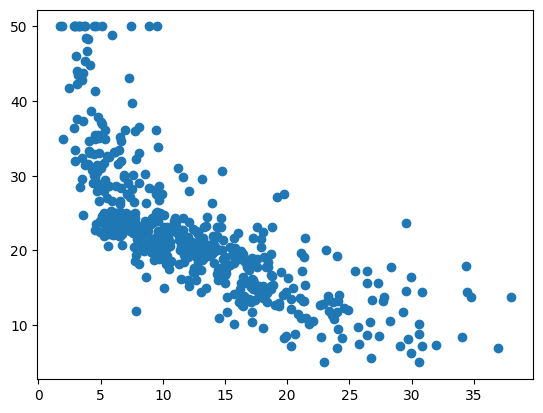

In [123]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
plt.scatter(data[:, -1], target)

w = torch.zeros(1, requires_grad=True)
w1 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

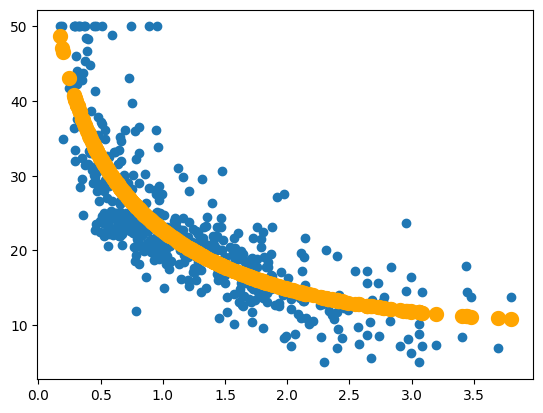

loss =  27.484514


In [124]:
from IPython.display import clear_output

for i in range(200):

    y_pred = w1 * torch.log(x) + w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    with torch.no_grad():
        w.data = w - 0.05 * w.grad.data
        w1.data = w1 - 0.05 * w1.grad.data
        
        b.data = b - 0.05 * b.grad.data

        # zero gradients
        w.grad.zero_()
        w1.grad.zero_()
        b.grad.zero_()

    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.item() < 0.5:
            print("Done!")
            break

## Полносвязные модели

Для того, чтобы создать любую модель в pytorch нам надо создать класс, который наследуюется от nn.Module. Нам необходимо определить методы `__init__` и `forward()`.

In [52]:
import os
import torch
from torch import nn
from typing import Tuple

In [53]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_shape: Tuple[int, int] = (28, 28), num_of_classes: int = 10):
        super(FullyConnectedNetwork, self).__init__()

        # First of all we need to flatten image to vector
        self.flatten = nn.Flatten()
        # Fully connected layer with 28*28 input neurons and 512 output
        self.fc_1 = nn.Linear(input_shape[0] * input_shape[1], 512)

        # Activation function ReLU
        self.activation_1 = nn.ReLU()

        self.fc_2 = nn.Linear(512, 512)
        self.activation_2 = nn.ReLU()

        self.output = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc_1(x)
        x = self.activation_1(x)
        x = self.fc_2(x)
        x = self.activation_2(x)
        x = self.output(x)

        return x

Давайте посмотрим, что делает слой Flatten:



In [54]:
# создаем тензор в формате N, C, H, W
x = torch.randn(8, 1, 28, 28)
res = nn.Flatten()(x)
res.shape

torch.Size([8, 784])

Применим к результату Flatten Линейный слой:


In [55]:
res = nn.Linear(28 * 28, 512)(res)
res.shape

torch.Size([8, 512])

Давайте теперь запустим всю сеть:


In [56]:
x = torch.rand((1, 1, 28, 28))

net = FullyConnectedNetwork()
result = net(x)
print(result.detach().numpy())

[[ 0.04765341  0.00020284  0.01714931  0.02254318  0.0956758   0.01802395
   0.03064454  0.0211777   0.04170733 -0.02862894]]


Модернизируем слегка нашу модель. Помним, что на выходе последнего слоя нам необходимо нормализовать наши выходы. Для этого нам может понадобиться [torch.nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax).


In [57]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_shape: Tuple[int, int] = (28, 28), num_of_classes: int = 10):
        super(FullyConnectedNetwork, self).__init__()

        # First of all we need to flatten image to vector
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(input_shape[0] * input_shape[1], 512)
        self.activation_1 = nn.ReLU()

        self.fc_2 = nn.Linear(512, 512)
        self.activation_2 = nn.ReLU()

        self.output = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc_1(x)
        x = self.activation_1(x)
        x = self.fc_2(x)
        x = self.activation_2(x)
        x = self.output(x)

        x = self.softmax(x)

        return x

In [117]:
x = torch.rand((1, 1, 28, 28))

net = FullyConnectedNetwork()
result = net(x)
print(result.detach().numpy())
print(result.sum(axis=1).detach().numpy())

[[-0.04766403 -0.04867452 -0.03595979  0.06610333  0.03958176  0.01493987
   0.01690261  0.01167393  0.0037233  -0.05873347]]
[-0.03810702]


Как мы можем заметить, вектор на выходе модели мы можем интерпертировать как распределение вероятностей предсказанного класса (сумма всех элементов равна 1).

Однако у нас получился не самый лаконичный код модели. Существует много различных способов задать одну и ту же модель. Одним из них является [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential).

In [59]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_shape: Tuple[int, int] = (28, 28), num_of_classes: int = 10):
        super(FullyConnectedNetwork, self).__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[0] * input_shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

In [60]:
x = torch.rand((1, 1, 28, 28))

net = FullyConnectedNetwork()
result = net(x)
print(result.detach().numpy())
print(result.sum(axis=1).detach().numpy())

[[0.10440424 0.09047645 0.10493499 0.09958836 0.106519   0.09772526
  0.10762508 0.09371432 0.10274049 0.09227178]]
[0.99999994]


In [61]:
with torch.no_grad():
    result = net(x)
    print(result.numpy())
    print(result.sum(axis=1).numpy())

[[0.10440424 0.09047645 0.10493499 0.09958836 0.106519   0.09772526
  0.10762508 0.09371432 0.10274049 0.09227178]]
[0.99999994]


In [62]:
print(net)

FullyConnectedNetwork(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
    (6): Softmax(dim=1)
  )
)


In [63]:
for name, param in net.named_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n')

Layer: model.1.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0035,  0.0064, -0.0211,  ...,  0.0103,  0.0148, -0.0121],
        [ 0.0141, -0.0087,  0.0284,  ...,  0.0317, -0.0199,  0.0084]],
       grad_fn=<SliceBackward0>) 

Layer: model.1.bias | Size: torch.Size([512]) | Values : tensor([ 0.0239, -0.0191], grad_fn=<SliceBackward0>) 

Layer: model.3.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0225, -0.0289,  0.0425,  ...,  0.0145, -0.0369, -0.0334],
        [ 0.0138, -0.0169,  0.0153,  ...,  0.0307,  0.0021,  0.0039]],
       grad_fn=<SliceBackward0>) 

Layer: model.3.bias | Size: torch.Size([512]) | Values : tensor([-0.0190, -0.0406], grad_fn=<SliceBackward0>) 

Layer: model.5.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0386, -0.0392,  0.0240,  ..., -0.0439, -0.0214,  0.0149],
        [ 0.0281,  0.0164, -0.0420,  ..., -0.0019,  0.0432, -0.0361]],
       grad_fn=<SliceBackward0>) 

Layer: model.5.bias | Size: torch.Size([10]) | Values : t

Давайте визуализируем нашу модель. Для этого можно воспользоваться утилитой tensorboard. Она позволяет делать много крутых вещей. В том числе и визуализацию обучения. В документации PyTorch достаточно подробно описано, как пользоваться ей см [здесь](https://pytorch.org/docs/stable/tensorboard.html) и [здесь](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html). Также полезно посмотреть [туториал](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb) от tensorflow, как работать с тензорбордом в колабе.

In [64]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/visualize_model')
x = torch.rand((1, 1, 28, 28))
writer.add_graph(net, x)
writer.close()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir runs/visualize_model

С тем, как создать модель мы немного познакомились. Давайте теперь познакомимся с тем, как нам добыть данные для обучения.

## Датасеты

Существует множество различных открытых наборов данных для обучения моделей. Есть так "игрушечные" наборы данных, которые используются в основном для изучения deep learning а также для быстрых исследований.

* [MNIST](http://yann.lecun.com/exdb/mnist/)
* [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
* [Kuzushiji-MNIST](https://github.com/rois-codh/kmnist)
* [EMNIST](https://www.westernsydney.edu.au/bens/home/reproducible_research/emnist)
* [QMNIST](https://github.com/facebookresearch/qmnis)

* [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)
* [CIFAR100](https://www.cs.toronto.edu/~kriz/cifar.html)

Также существуют наборы данных, на которых обучаются модели, которые прямо сейчас могут использоваться в каком-либо приложении:

* [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
* [ImageNet](http://image-net.org/)
* [MS Coco Detection](https://cocodataset.org/#detection-2016)
* [Cityscapes](http://www.cityscapes-dataset.com/)
* [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/)
* [KITTI](http://www.cvlibs.net/datasets/kitti/)
<br>

и многие другие.


В torchvision также уже существуют подготовленные для нас классы для работы со многими датасетами. Они все наследуются от класса [VisionDataset](https://pytorch.org/vision/stable/datasets.html?highlight=visiondataset#torchvision.datasets.VisionDataset) (который в свою очередь наследуется от класса [Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)), но помимо логики по выдачи следующего элемента позволяют скачать данные, распаковать и пользоваться ими не погружаясь в детали.


Когда дело касается конкретной задачи, то часто полезно бывает иметь какой-то специализированный под данную задачу набор данных. Прежде чем кидаться собирать данные вручную и размечать их, попробуйте найти уже готовый датасет с открытой лицензией. В случае, если лицензия запрещает использовать набор данных для коммерческого использования, то можно попробовать связаться с авторами и приобрести права на использование в коммерческих целях.
Ниже представлен небольшой список ресурсов, где можно поискать датасеты:

* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Kaggle datasets](https://www.kaggle.com/datasets)
* [Репозиторий awesome public datasets](https://github.com/awesomedata/awesome-public-datasets#imageprocessing)




В данном ноутбуке мы будем пользоваться датасетом Fashion-MNIST. Но если по каким либо причинам вам это не нравится, то можно заменить на любой другой игрушечный датасет.

In [65]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor

In [66]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [67]:
training_data = torchvision.datasets.FashionMNIST(
    root="datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16058046.60it/s]


Extracting datasets\FashionMNIST\raw\train-images-idx3-ubyte.gz to datasets\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 854181.96it/s]


Extracting datasets\FashionMNIST\raw\train-labels-idx1-ubyte.gz to datasets\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 9949703.41it/s]


Extracting datasets\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to datasets\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5145919.21it/s]

Extracting datasets\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to datasets\FashionMNIST\raw



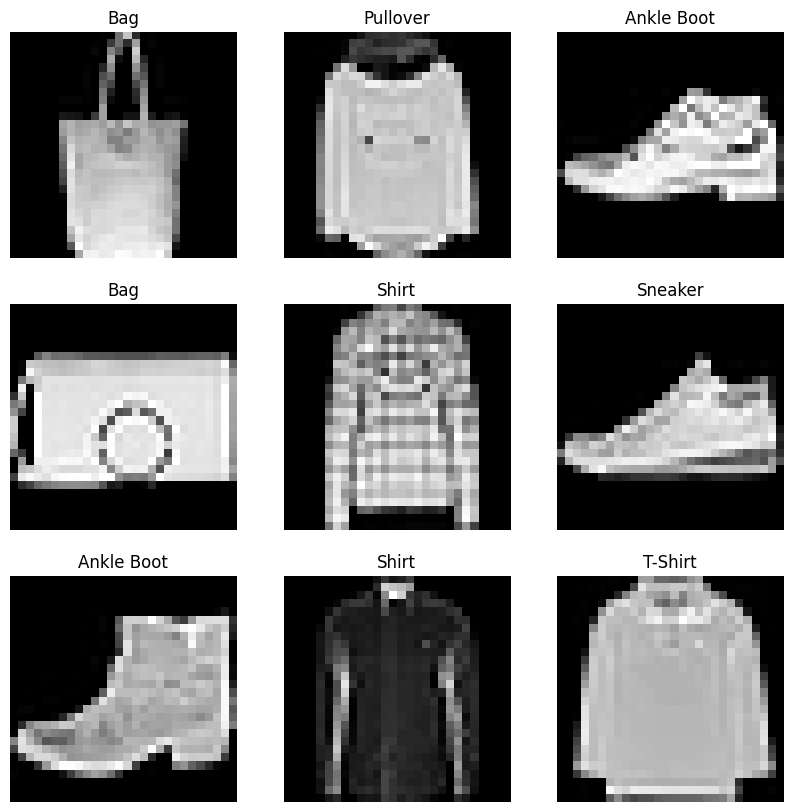

In [68]:
_, axes = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
for i in range(9):
    sample_idx = np.random.randint(0, len(training_data))
    img, label = training_data[sample_idx]
    j, k = i // 3, i % 3
    axes[j][k].set_title(labels_map[label])
    axes[j][k].axis("off")
    axes[j][k].imshow(img.squeeze().numpy(), cmap="gray")
plt.show()

Давайте с вами сами попробуем написать класс Dataset для работы с датасетом Fashion MNIST. Потому как при работе с кастомными данными нам точно потребуется писать свой собственный класс датасет.

Вообще говоря, нам нужно, чтобы этот класс наследовался от класса

In [69]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [70]:
import os
import gzip
import numpy as np
from torch.utils.data import Dataset
from typing import Tuple


class CustomFashionMNIST(Dataset):
    def __init__(self, path_to_fashion_mnist: str, train: bool = True):
      if train:
          prefix = 'train'
      else:
          prefix = 't10k'
      labels_path = os.path.join(path_to_fashion_mnist,
                               f'{prefix}-labels-idx1-ubyte.gz')
      images_path = os.path.join(path_to_fashion_mnist,
                               f'{prefix}-images-idx3-ubyte.gz')

      with gzip.open(labels_path, 'rb') as lbpath:
          self.labels = np.frombuffer(
              lbpath.read(), dtype=np.uint8, offset=8)

      with gzip.open(images_path, 'rb') as imgpath:
          self.images = np.frombuffer(
              imgpath.read(), dtype=np.uint8, offset=16
          ).reshape(-1, 1, 28, 28).astype(np.float32) / 255.

    def __len__(self) -> int:
        """Returns len of dataset"""
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, int]:
      """Returns tuple of image and its label"""
      return torch.tensor(self.images[idx]), self.labels[idx]


In [71]:
training_data = CustomFashionMNIST('datasets/FashionMNIST/raw', True)
test_data = CustomFashionMNIST('datasets/FashionMNIST/raw', False)

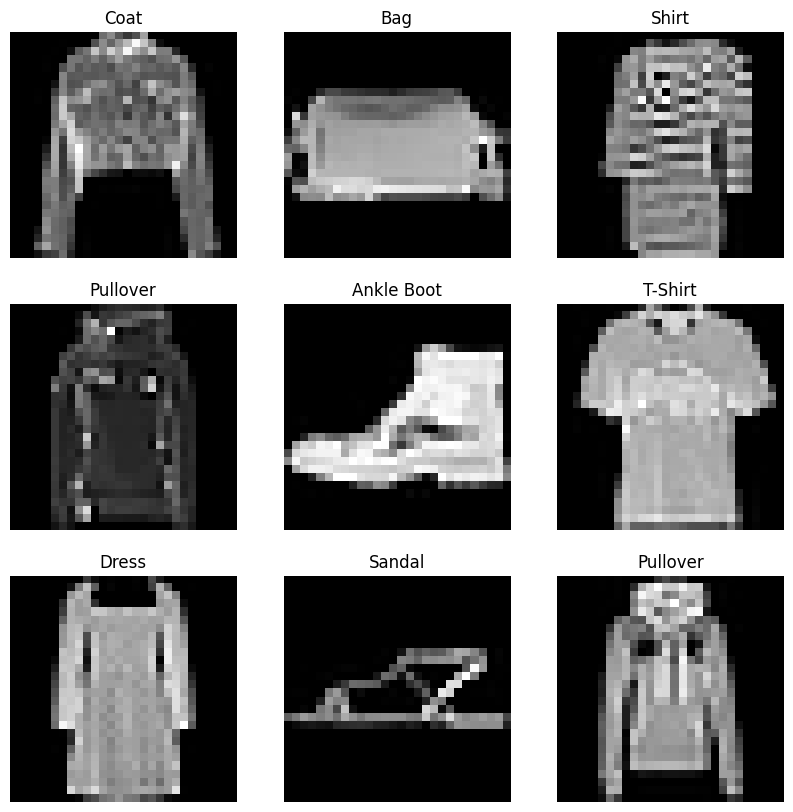

In [72]:
_, axes = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
for i in range(9):
    sample_idx = np.random.randint(0, len(training_data))
    img, label = training_data[sample_idx]
    j, k = i // 3, i % 3
    axes[j][k].set_title(labels_map[label])
    axes[j][k].axis("off")
    axes[j][k].imshow(img.squeeze().numpy(), cmap="gray")
plt.show()

Обычно мы никогда не обучаем модельки с использованием одной картинки на каждом шаге. Для того, чтобы нам не надо было брать на себя заботы по созданию таких батчей, в PyTorch есть класс [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Он на самом деле позволяет делать нам множество классных вещей:

- определять размеры батча
- перемешивать датасет на каждой эпохе
- использовать [сэмплеры](https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler) (бывает очень полезно при несбалансированных классах)
- копировать тензоры на видеокарту, если мы укажем соответствующий параметр
- использовать заданное количество процессов для подгрузки данных

и многое другое.



In [73]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [74]:
train_features, train_labels = next(iter(train_dataloader))
print(type(train_features), type(train_labels))
print(train_features.shape, train_labels.shape)


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([64, 1, 28, 28]) torch.Size([64])


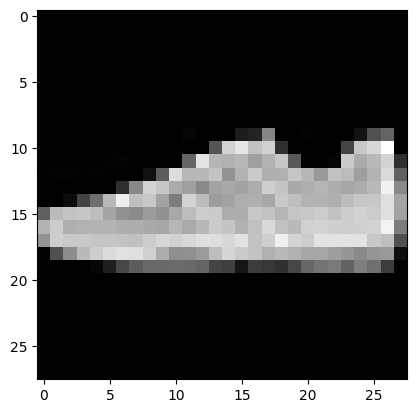

Label: Sneaker


In [75]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

## Тренируем полносвязный классификатор
У нас есть практически все для того, чтобы обучать полносвязный классификатор.

Напомним, что нам необходимо несколько компонент:

- Данные
- Модель
- Лосс функция
- Оптимизатор
- было бы неплохо для оценки качества использовать некоторую метрику.

На прошлых занятиях мы познакомились с [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) функцией. К счастью, в коде для определения данной функции нам надо написать всего лишь одну строчку:

In [76]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def celoss(pred, labels):
    # use torch.gather

In [ ]:
predictions = torch.tensor([[-10, 3, 30], [24, 0.5, 10]])
labels = torch.tensor([2, 0])
loss_fn(predictions, labels), celoss(predictions, labels)

### Какую метрику мы можем использовать для оценки качества?

Для оценки качества в данном примере будем использовать метрику Accuracy:

$$ Accuracy = \frac {correct}{total}$$

### Когда accuracy может быть плохой идеей?

Эта метрика сработает в нашем случае так как у нас сбалансированный датасет. То есть для каждого класса у нас одинаковое количество экземпляров. В случае несбалансированного датасета данная метрика не репрезентативна. Например, если у нас 99% собак и 1% процент кошек, то модель выдающая всегда предсказание "собака" будет иметь метрику качества 99%, при этом она будет абсолютно непригодна к использованию. Про другие метрики мы поговорим в следующем занятии.

## Обучение модели

Давайте скорее перейдем непосредственно к самому обучению.
Для этого определим все необходимые компоненты.

Модель:

In [79]:
import os
import gzip
from typing import Tuple

import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm

In [80]:
%load_ext tensorboard

Датасеты и даталоадеры:

In [82]:
class CustomFashionMNIST(Dataset):
    def __init__(self, path_to_fashion_mnist: str, train: bool = True):
      if train:
          prefix = 'train'
      else:
          prefix = 't10k'
      labels_path = os.path.join(path_to_fashion_mnist,
                               f'{prefix}-labels-idx1-ubyte.gz')
      images_path = os.path.join(path_to_fashion_mnist,
                               f'{prefix}-images-idx3-ubyte.gz')

      with gzip.open(labels_path, 'rb') as lbpath:
          self.labels = np.frombuffer(
              lbpath.read(), dtype=np.uint8, offset=8)

      with gzip.open(images_path, 'rb') as imgpath:
          self.images = np.frombuffer(
              imgpath.read(), dtype=np.uint8, offset=16
          ).reshape(-1, 1, 28, 28).astype(np.float32) / 255.

    def __len__(self) -> int:
        """Returns len of dataset"""
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, int]:
      """Returns tuple of image and its label"""
      return torch.from_numpy(self.images[idx]), self.labels[idx]

In [83]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch_n, device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    num_batches = len(dataloader)

    train_loss, train_accuracy = 0, 0

    with tqdm(dataloader, unit='batch') as tepoch:
        for images, labels in tepoch:
            batch_size = images.shape[0]
            # Определяем описание для tqdm
            tepoch.set_description(f'Epoch {epoch_n}')

            images, labels = images.to(device), labels.to(device)
            # Делаем forward pass
            pred = model(images)
            # вычисляем loss
            loss = loss_fn(pred, labels)

            # Вычисляем градиенты
            optimizer.zero_grad()
            loss.backward()

            # Делаем шаг оптимизатора
            optimizer.step()

            # Вычисляем количество правильных ответов
            correct = (pred.argmax(1) == labels).sum().item()
            accuracy = correct / batch_size

            # Прибавляем loss и accuracy к полным значениям за эпоху
            train_loss += loss.item()
            train_accuracy += correct
            # Выводим в tqdm текущие лосс и точность
            tepoch.set_postfix(loss=loss.item(), accuracy=accuracy)

    # вычисляем среднее
    train_loss /= num_batches
    train_accuracy /= len_of_dataset

    # Записываем в тензорборд
    summary_writer.add_scalar(
        'train/loss',
        train_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'train/accuracy',
        train_accuracy,
        epoch_n
    )

def test_loop(dataloader, model, loss_fn, epoch_n,  device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    # На этапе валидации нам не нужно вычислять градиенты
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= len_of_dataset

    summary_writer.add_scalar(
        'test/loss',
        test_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'test/accuracy',
        correct,
        epoch_n
    )
    print(f'Test Metrics: \n Accuracy: {(correct):>0.3f}%, Avg loss: {test_loss:>8f} \n')

In [84]:
model = FullyConnectedNetwork()
model.to(device)

FullyConnectedNetwork(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
    (6): Softmax(dim=1)
  )
)

In [85]:
training_data = CustomFashionMNIST('datasets/FashionMNIST/raw', True)
test_data = CustomFashionMNIST('datasets/FashionMNIST/raw', False)

batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [88]:
%tensorboard --logdir runs/first_experiment --port 6008

In [89]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_shape: Tuple[int, int] = (28, 28), num_of_classes: int = 10, add_backprop_hook=False):
        # Тут добавлен обучающий пример добавления hook для отладки градиентов последнего слоя. Вы
        # можете модифицировать функцию hook и добавлять её с поомщью метода register_full_backward_hook
        # для любого экземпляра класса наследника nn.Module. В данном случае мы просто выводим в консоль
        # размеры тензоров-градиентов
        super(FullyConnectedNetwork, self).__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[0] * input_shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        if add_backprop_hook:
            def hook(m, g_in, g_out):
                print(g_in[0].shape, g_out[0].shape)
            self.model[-1].register_full_backward_hook(hook)

    def forward(self, x):
        return self.model(x)

learning_rate = 1e-2
batch_size = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()

In [90]:
model = FullyConnectedNetwork(add_backprop_hook=True)
model.to(device)
X_batch, y_batch = next(iter(train_dataloader))
pred = model(X_batch.to(device))
loss = loss_fn(pred, y_batch.to(device))
loss.backward();  # при вызове метода бекворд мы расчитываем градиенты и видим вывод функции hook

torch.Size([128, 512]) torch.Size([128, 10])


In [91]:
import shutil
shutil.rmtree('runs/first_experiment', ignore_errors=True)
num_of_epochs = 10

writer = SummaryWriter('runs/first_experiment')

model = FullyConnectedNetwork()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch_n in range(num_of_epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, epoch_n, device, writer)
    test_loop(test_dataloader, model, loss_fn, epoch_n, device, writer)
print("Done!")

x = torch.rand((1, 1, 28, 28))
writer.add_graph(model, x.to(device))
writer.close()

  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.829%, Avg loss: 0.482932 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.836%, Avg loss: 0.459249 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.853%, Avg loss: 0.408281 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.855%, Avg loss: 0.412874 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.857%, Avg loss: 0.401180 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.856%, Avg loss: 0.405896 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.865%, Avg loss: 0.401358 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.867%, Avg loss: 0.395063 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.868%, Avg loss: 0.391332 



  0%|          | 0/469 [00:00<?, ?batch/s]

Test Metrics: 
 Accuracy: 0.864%, Avg loss: 0.387758 

Done!


## Сохранение модели:

Допустим, мы уже обучили модель. Нам надо как-то сохранить ее веса. Для этого в PyTorch есть функция save().

In [92]:
torch.save(model.state_dict(), 'model_weights.pth')

In [93]:
print(model.state_dict().keys())

odict_keys(['model.1.weight', 'model.1.bias', 'model.3.weight', 'model.3.bias', 'model.5.weight', 'model.5.bias'])


Теперь для того, чтобы загрузить модель нам необходимо создать класс модели и вызвать метод load().

In [94]:
model = FullyConnectedNetwork()
model.load_state_dict(torch.load('model_weights.pth'))


<All keys matched successfully>

Мы также можем запиклить всю модель!

In [95]:
torch.save(model, 'model.pth')

In [96]:
model_loaded = torch.load('model.pth')

In [97]:
print(type(model_loaded))

<class '__main__.FullyConnectedNetwork'>


Обратите внимание, что хоть мы и можем загрузить класс модели, мы все равно должны сохранять ее код неизменным, потому что при загрузке нам понадобится определение данного класса.

Существует способ сохранить модель так, чтобы её можно было загрузить без определения класса модели (с помощью torch.jit, см. ниже), однако рекомендуется сохранять state_dict.

In [98]:
x = torch.rand((1, 1, 28, 28), device=device)
model.to(device)
torch.jit.save(torch.jit.trace(model, (x)), "model.pth")  # необходимо передать dummy input
loaded_model = torch.jit.load("model.pth")
loaded_model

RecursiveScriptModule(
  original_name=FullyConnectedNetwork
  (model): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Flatten)
    (1): RecursiveScriptModule(original_name=Linear)
    (2): RecursiveScriptModule(original_name=ReLU)
    (3): RecursiveScriptModule(original_name=Linear)
    (4): RecursiveScriptModule(original_name=ReLU)
    (5): RecursiveScriptModule(original_name=Linear)
  )
)

In [ ]:
!nvidia-smi

In [ ]:
x = torch.rand((1000, 100, 100, 100), device='cuda')
!nvidia-smi

In [ ]:
del x

In [ ]:
!nvidia-smi  # after deleting object x gpu memory doesn't just get clear automatically

In [ ]:
for _ in range(10):
    x = torch.rand((1000, 100, 100, 100), device='cuda')  # but you still can use available memory. it seems that when torch needs to allocate gpu memory it just looks for unused memory and re-allocates it

In [ ]:
del x

In [ ]:
torch.cuda.empty_cache()
!nvidia-smi  # when you call torch.cuda.empty_cache() after del x the gpu memory will get cleared

### Сохранение чекпоинтов
Практически всегда нам необходимо сохранять не только сами модели но и некоторые дополнительные параметры, такие как номер эпохи, состояние оптимизатора, значение лосса, значение метрик и т.д.

In [99]:
path_to_save_checkpoint = 'checkpoint.pth'
torch.save(
    {
        'epoch': 100,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': 0.001,
    },
    path_to_save_checkpoint
)

In [100]:
model = FullyConnectedNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


checkpoint = torch.load(path_to_save_checkpoint)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']


print(f'Loss {loss}')
print(f'Epoch {epoch}')
print(optimizer)

Loss 0.001
Epoch 100
SGD (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    nesterov: False
    weight_decay: 0
)


Прикольные ссылки:

* [Интерактивная среда tensorflow](http://playground.tensorflow.org)

* [Визуализация некоторых моделей](https://tensorspace.org/)